In [4]:
import keras.backend as K
from tensorflow.keras import Model
from keras.models import Sequential
from tensorflow.keras.layers import  Input, Conv2D, MaxPool2D, Dense, Flatten, Dropout, AveragePooling2D, Concatenate, GlobalAveragePooling2D, BatchNormalization, ReLU, Add, SeparableConv2D

In [7]:
#@title Data Cleansing

import cv2
import imghdr
from matplotlib import pyplot as plt
import os
data_dir = ['Dataset_img']

image_exts = ['jpg', 'jpeg', 'png', 'bmp']

for i in data_dir:
    for image_class in os.listdir(i):
        for image in os.listdir(os.path.join(i, image_class)):
            image_path = os.path.join(i, image_class, image)
            try:
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in image_exts:
                    print('Image not in ext list {}'.format(image_path))
                    os.remove(image_path)
            except Exception as e:
                print('Issue with image {}'.format(image_path))

Found 1097 files belonging to 3 classes.


Batch classes:  [2 0 2 2 0 1 1 0 1 1 1 2 1 2 1 2 1 1 2 2 1 2 0 1 1 2 2 1 1 1 1 2]


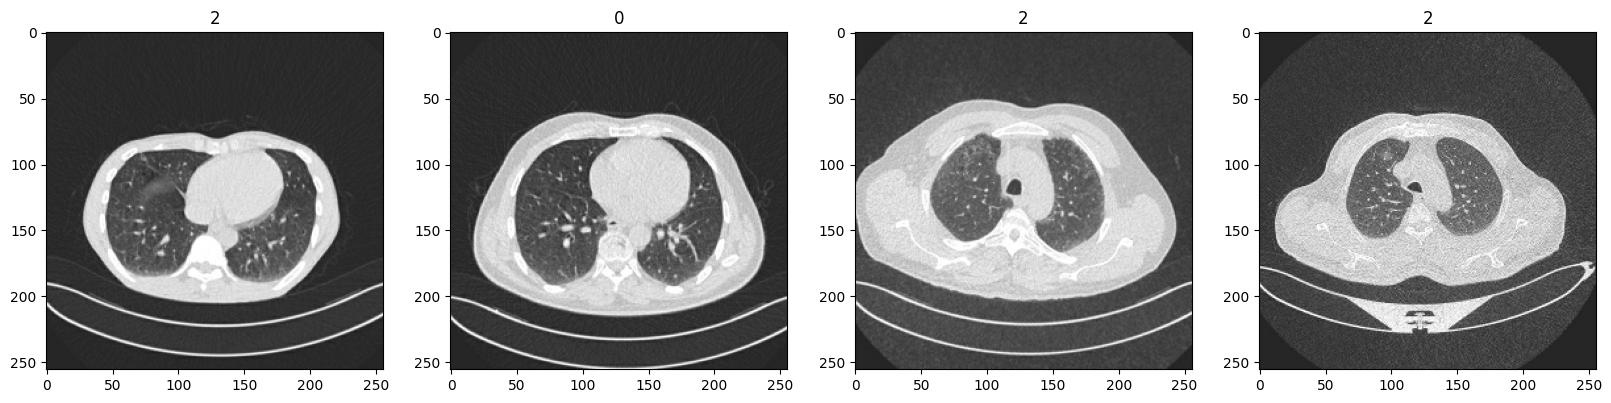

In [9]:
#@title Creating Data Pipeline
import numpy as np
import tensorflow as tf

data = tf.keras.utils.image_dataset_from_directory('Dataset_img', shuffle=True)

data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
print("Batch classes: ", batch[1])
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [10]:
#@title Preprocessing Data

''' Scaling Data '''
# Scaling Data
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()[0].max()


''' Splitting Data '''
train_size = int(len(data)*.7)
val_size = int(len(data)*.1)
test_size = int(len(data)*.2)+1

train = data.take(train_size)
val = data.take(val_size)
test = data.take(test_size)

print(train_size, "+", test_size, "+", val_size, "=", len(data))

24 + 8 + 3 = 35


In [25]:
model1 = Sequential([
    Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), input_shape = (256, 256, 3), activation = "relu", padding = "same"),
    MaxPool2D(pool_size = (2,2)),
    BatchNormalization(),
    
    Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), padding = "valid"),
    MaxPool2D(pool_size = (2,2)),
    BatchNormalization(),
    
    Conv2D(filters = 150, kernel_size = (3,3), strides = (1,1), padding = "valid"),
    MaxPool2D(pool_size = (2,2)),
    BatchNormalization(),
    
    Conv2D(filters = 180, kernel_size = (3,3), strides = (1,1), padding = "valid"),
    MaxPool2D(pool_size = (2,2)),
    BatchNormalization(),
    
    Flatten(),
    Dense(4096, activation = "relu"),
    Dropout(0.5),
    Dense(256),
    Dropout(0.25),
    Dense(3, activation = "softmax")
])
model1.compile('Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_32 (Conv2D)              │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 126, 126, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 63, 63, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 61, 61, 150)    │        86,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 30, 30, 150)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 30, 30, 150)    │           600 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 28, 28, 180)    │       243,180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 14, 14, 180)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 14, 14, 180)    │           720 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 35280)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 4096)           │   144,510,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 145,930,861 (556.68 MB)

 Trainable params: 145,929,945 (556.68 MB)

 Non-trainable params: 916 (3.58 KB)

In [26]:
from tensorflow.keras.optimizers import Adam

input_shape = (256, 256, 3)
n_classes = 3

from keras.optimizers import SGD
opt = SGD(learning_rate=0.1)


hist2 = model1.fit(train, epochs=30, validation_data=val)
print(hist2.history)

Epoch 1/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 116s 4s/step - accuracy: 0.5123 - loss: 90.8923 - val_accuracy: 0.2396 - val_loss: 61.9517
Epoch 2/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 90s 4s/step - accuracy: 0.7038 - loss: 7.1856 - val_accuracy: 0.6875 - val_loss: 6.5543
Epoch 3/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - accuracy: 0.7254 - loss: 5.3616 - val_accuracy: 0.4583 - val_loss: 12.1528
Epoch 4/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 88s 4s/step - accuracy: 0.7966 - loss: 4.5085 - val_accuracy: 0.4688 - val_loss: 27.0590
Epoch 5/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.8448 - loss: 2.1478 - val_accuracy: 0.5417 - val_loss: 3.3435
Epoch 6/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 1769s 77s/step - accuracy: 0.8552 - loss: 1.5049 - val_accuracy: 0.4792 - val_loss: 9.6754
Epoch 7/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - accuracy: 0.8519 - loss: 1.5618 - val_accuracy: 0.5312 - val_loss: 5.9644
Epoch 8/30
24/24 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.8661 - loss: 0.5838 - val_accuracy: 0.4896 - v

8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 498ms/step - accuracy: 0.6560 - loss: 7.2243
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 804ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
Precision:0.922448992729187, Recall:0.9955947399139404, Accuracy (Binary):0.57421875, Accuracy (sparse_categorical):[1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1.]
Confusion Matrix for Model 1: 
 [[ 1  1  0]
 [ 0 16  0]
 [ 0  9  5]]


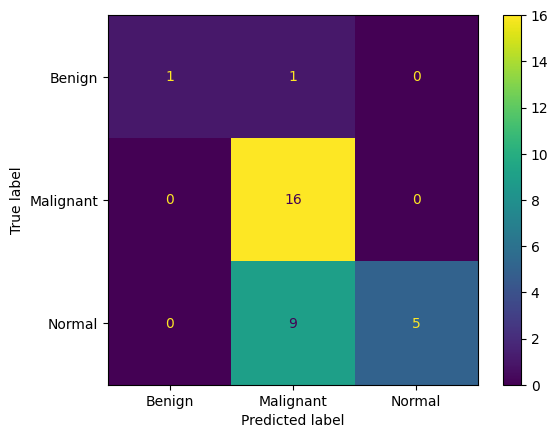

In [27]:
''' Evaluation '''
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy, sparse_categorical_accuracy
from sklearn.metrics import *

loss1, results1 = model1.evaluate(test, batch_size=328)



pre1 = Precision()
re1 = Recall()
acc1 = BinaryAccuracy()
for batch1 in test.as_numpy_iterator():
    X1, y1 = batch1
    yhat1 = model1.predict(X1)
    max = a = 0
    arr = np.ones(yhat1.shape[0])*-1
    for i in yhat1:
        if ((i[0] > i[1]) and (i[0] > i[2])):
            max = 0
        elif ((i[1] > i[0]) and (i[1] > i[2])):
            max = 1
        else:
            max = 2
        arr[a] = max
        a+=1
    pre1.update_state(y1, arr)
    re1.update_state(y1, arr)
    acc1.update_state(y1, arr)
acc11 = sparse_categorical_accuracy(y1, yhat1)
assert acc11.shape == (y1.shape[0],)
print(f'Precision:{pre1.result().numpy()}, Recall:{re1.result().numpy()}, Accuracy (Binary):{acc1.result().numpy()}, Accuracy (sparse_categorical):{acc11.numpy()}')
matrix = confusion_matrix(y1, arr)
print("Confusion Matrix for Model 1: \n", matrix)
display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['Benign', 'Malignant', 'Normal'])
display.plot()
plt.show()


Precision:0.9307692050933838, Recall:0.9907881021499634, Accuracy (Binary):0.5551503896713257
Confusion Matrix for Model 1: 
 [[ 48  72   0]
 [  0 561   0]
 [  9 280 127]]


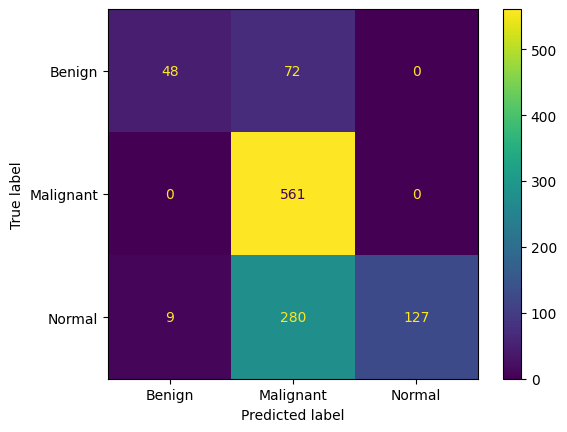

In [29]:
#@title Precision, Recall and Accuracy of the Models with respect to all images in dataset

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy, sparse_categorical_accuracy
from sklearn.metrics import *

labels = []; p1 = []; p2 = []; p3 = []
pre1 = Precision()
re1 = Recall()
acc1 = BinaryAccuracy()
for j in data_dir:
    for c, image_class in enumerate(os.listdir(j)):
        for image in os.listdir(os.path.join(j, image_class)):
            image_path = os.path.join(j, image_class, image)
            img = cv2.imread(image_path)
            resize = tf.image.resize(img, (256, 256))

            yhat1 = model1.predict(np.expand_dims(resize/255, 0), verbose=0)
           
            max = 0
            for i in yhat1:
                if ((i[0] > i[1]) and (i[0] > i[2])):
                    max = 0
                elif ((i[1] > i[0]) and (i[1] > i[2])):
                    max = 1
                else:
                    max = 2
                p1.append(max)
            labels.append(c)
labels = np.asarray(labels)
p1 = np.asarray(p1)

pre1.update_state(labels, p1)
re1.update_state(labels, p1)
acc1.update_state(labels, p1)
print(f'Precision:{pre1.result().numpy()}, Recall:{re1.result().numpy()}, Accuracy (Binary):{acc1.result().numpy()}')
matrix = confusion_matrix(labels, p1)
print("Confusion Matrix for Model 1: \n", matrix)
display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['Benign', 'Malignant', 'Normal'])
display.plot()
plt.show()
